In [76]:
import numpy as np 
import pandas as pd
import os
import glob
from scipy import stats
from scipy.stats import pearsonr

In [112]:
def calculate_fd(motion_params):
    # Compute the displacement between consecutive time points
    translations = motion_params[:, :3]  # x, y, z
    rotations = motion_params[:, 3:]  # roll, pitch, yaw

    # Compute the displacement (difference between consecutive frames)
    delta_translations = np.abs(np.diff(translations, axis=0))
    delta_rotations = np.abs(np.diff(rotations, axis=0))

    # Framewise Displacement: sum of absolute changes in translations and rotations
    fd = np.sum(delta_translations, axis=1) + np.sum(delta_rotations, axis=1)

    # Add the first frame FD as 0 (no difference for the first frame)
    fd = np.insert(fd, 0, 0)

    return fd

In [166]:
motion_params = np.loadtxt('only_mc/within_mask_mc/sub-PAT028_run-0_eyes_only_mc_mc_right.txt')
    
    # Calculate the FD for the current file
fd = calculate_fd(motion_params)
    

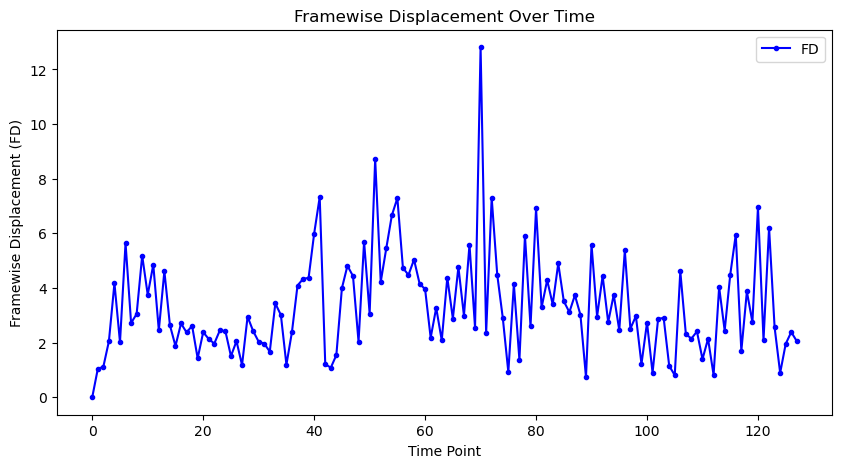

In [169]:
# Ensure fd is a NumPy array
fd = np.array(fd)  

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(fd, marker='o', linestyle='-', color='b', markersize=3, label="FD")

# Labels and title
plt.xlabel("Time Point")
plt.ylabel("Framewise Displacement (FD)")
plt.title("Framewise Displacement Over Time")
plt.legend()

# Show the plot
plt.show()

In [144]:

# Define the directory path
directory_path = 'only_mc/within_mask_mc/'

# Use glob to find all files ending with 'mc_left.txt'
files = glob.glob(os.path.join(directory_path, '*mc_left.txt'))

# Array to store the mean FD for each file
mean_fds_left = []

# Process each file
for file in files:
    # Read the motion parameters from the file
    motion_params = np.loadtxt(file)
    
    # Calculate the FD for the current file
    fd = calculate_fd(motion_params)
    
    # Calculate the mean FD and append it to the array
    mean_fds_left.append(np.mean(fd))




directory_path = 'only_mc/within_mask_mc/'

# Use glob to find all files ending with 'mc_left.txt'
files = glob.glob(os.path.join(directory_path, '*mc_right.txt'))

# Array to store the mean FD for each file
mean_fds_right = []

# Process each file
for file in files:
    # Read the motion parameters from the file
    motion_params = np.loadtxt(file)
    
    # Calculate the FD for the current file
    fd = calculate_fd(motion_params)
    
    # Calculate the mean FD and append it to the array
    mean_fds_right.append(np.mean(fd))



In [134]:
files

['only_mc/within_mask_mc/sub-CON001_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON002_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON003_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON006_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON007_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON008_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON009_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON011_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON012_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON014_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON019_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON021_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON022_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mask_mc/sub-CON023_run-0_eyes_only_mc_mc_right.txt',
 'only_mc/within_mas

In [145]:
len(mean_fds_left)

128

In [138]:
# Ensure both arrays have the same length
if len(mean_fds_right) == len(mean_fds_left):
    # Compute Pearson correlation
    corr, p_value = pearsonr(mean_fds_right, mean_fds_left)
    
    # Print results
    print(f"Correlation between mean_fds_right and mean_fds_left: {corr}")
    print(f"P-value: {p_value}")
else:
    print("Error: mean_fds_right and mean_fds_left have different lengths.")

Error: mean_fds_right and mean_fds_left have different lengths.


In [139]:
# Ensure the length of mean_fds is at least 130 (26 + 104)
if len(mean_fds) >= 130:
    # First 26 values
    first_26 = mean_fds[:26]
    
    # Last 104 values
    last_104 = mean_fds[26:]

    # Perform a t-test between the two groups
    t_stat, p_value = stats.ttest_ind(first_26, last_104)

    # Print the results
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
else:
    print("Not enough data to perform t-test.")


Not enough data to perform t-test.


In [147]:
t_stat, p_value = stats.ttest_ind(mean_fds_right[:26], mean_fds_right[26:])
print(p_value)
print(t_stat)

0.01882125409883446
2.3793243559598545


In [119]:
behaviorals = pd.read_csv("/home/koba/Desktop/brainhack/filtered_table.csv")

In [122]:
behaviorals.head(26)

,participant_id,redcap_event_name,subj_type,inclusion,inclusion_notes,lesion_side,basic_study_information_complete,Unnamed: 7,acute_beh,acute_scan,...,sf36_36,sf36_physical,sf36_rolephys,sf36_roleemo,sf36_en,sf36_emo,sf36_soc,sf36_pain,sf36_gen,functional_outcome_battery_complete
0,sub-CON001,basic_subject_info_arm_2,1,0,4.0,NaN,2,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-CON002,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,100.0,100.0,100.0,100.000000,80.0,96.0,100.0,100.0,95.0,2.0
2,sub-CON003,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,75.0,100.0,100.0,100.000000,75.0,92.0,100.0,90.0,85.0,2.0
3,sub-CON006,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,75.0,65.0,100.0,100.000000,85.0,92.0,100.0,57.5,80.0,2.0
4,sub-CON007,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,75.0,100.0,100.0,100.000000,90.0,92.0,100.0,100.0,80.0,2.0
5,sub-CON008,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,100.0,95.0,100.0,100.000000,75.0,72.0,100.0,90.0,100.0,2.0
6,sub-CON009,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,100.0,100.0,100.0,100.000000,80.0,80.0,100.0,90.0,95.0,2.0
7,sub-CON011,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,75.0,80.0,100.0,66.666667,70.0,80.0,75.0,90.0,75.0,2.0
8,sub-CON012,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,100.0,100.0,100.0,100.000000,80.0,80.0,100.0,100.0,100.0,2.0
9,sub-CON014,basic_subject_info_arm_2,1,1,NaN,NaN,2,NaN,NaT,NaT,...,75.0,90.0,100.0,100.000000,80.0,92.0,100.0,77.5,75.0,2.0


In [160]:
pwd

'/media/koba/MULTIBOOT/net/ascratch/people/plgkoba/stroke_BIDS_firs_sessions/derivatives/brainhack/preprocessed_files'

Controls: Correlation = 0.047, P-value = 0.822
Stroke: Correlation = 0.212, P-value = 0.080


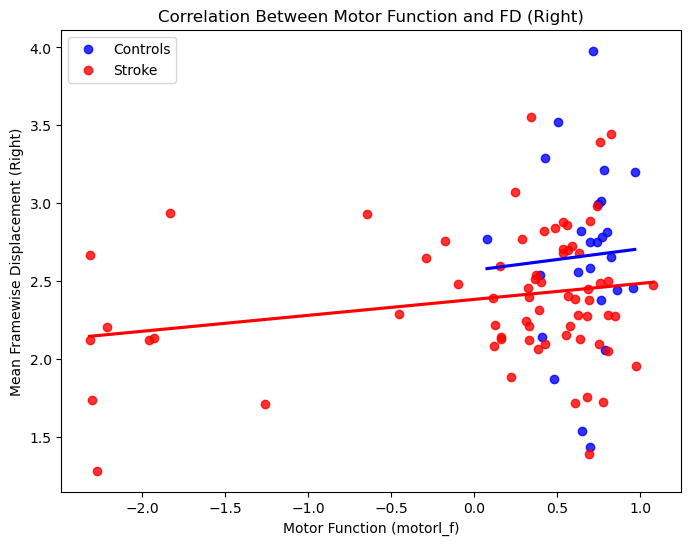

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Extract first 26 and last 104 values
motorl_f_controls = behaviorals.motorl_f[:26].to_numpy()
motorl_f_stroke = behaviorals.motorl_f[26:].to_numpy()
mean_fds_right_controls = np.array(mean_fds_right[:26])
mean_fds_right_stroke = np.array(mean_fds_right[26:])

# Create masks to remove NaNs and Infs
mask_controls = ~np.isnan(motorl_f_controls) & ~np.isnan(mean_fds_right_controls) & \
                ~np.isinf(motorl_f_controls) & ~np.isinf(mean_fds_right_controls)
mask_stroke = ~np.isnan(motorl_f_stroke) & ~np.isnan(mean_fds_right_stroke) & \
              ~np.isinf(motorl_f_stroke) & ~np.isinf(mean_fds_right_stroke)

# Filter out invalid values
motorl_f_controls = motorl_f_controls[mask_controls]
mean_fds_right_controls = mean_fds_right_controls[mask_controls]
motorl_f_stroke = motorl_f_stroke[mask_stroke]
mean_fds_right_stroke = mean_fds_right_stroke[mask_stroke]

# Compute Pearson correlations (only if valid data remains)
if len(motorl_f_controls) > 1 and len(mean_fds_right_controls) > 1:
    corr_controls, p_controls = pearsonr(motorl_f_controls, mean_fds_right_controls)
    print(f"Controls: Correlation = {corr_controls:.3f}, P-value = {p_controls:.3f}")
else:
    print("Not enough valid data for Controls correlation.")

if len(motorl_f_stroke) > 1 and len(mean_fds_right_stroke) > 1:
    corr_stroke, p_stroke = pearsonr(motorl_f_stroke, mean_fds_right_stroke)
    print(f"Stroke: Correlation = {corr_stroke:.3f}, P-value = {p_stroke:.3f}")
else:
    print("Not enough valid data for Stroke correlation.")

# Create scatter plot
plt.figure(figsize=(8, 6))

# Scatter plots with regression lines
sns.regplot(x=motorl_f_controls, y=mean_fds_right_controls, color="blue", label="Controls", scatter=True, ci=None)
sns.regplot(x=motorl_f_stroke, y=mean_fds_right_stroke, color="red", label="Stroke", scatter=True, ci=None)

# Labels and title
plt.xlabel("Motor Function (motorl_f)")
plt.ylabel("Mean Framewise Displacement (Right)")
plt.title("Correlation Between Motor Function and FD (Right)")
plt.legend()
plt.show()


In [164]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import re  # For sanitizing filenames

# Ensure the "graphs" directory exists
output_dir = "graphs"
os.makedirs(output_dir, exist_ok=True)

# Iterate over all numeric columns in behaviorals
for column in behaviorals.select_dtypes(include=['number']).columns:
    if "Unnamed" in column:  # Skip unnamed columns
        print(f"Skipping column: {column} (Unnamed)")
        continue

    print(f"Processing column: {column}")

    # Extract first 26 (controls) and last 104 (stroke)
    behavior_controls = behaviorals[column][:26].to_numpy()
    behavior_stroke = behaviorals[column][26:].to_numpy()
    mean_fds_right_controls = np.array(mean_fds_right[:26])
    mean_fds_right_stroke = np.array(mean_fds_right[26:])

    # Create masks to remove NaNs and Infs
    mask_controls = ~np.isnan(behavior_controls) & ~np.isnan(mean_fds_right_controls) & \
                    ~np.isinf(behavior_controls) & ~np.isinf(mean_fds_right_controls)
    mask_stroke = ~np.isnan(behavior_stroke) & ~np.isnan(mean_fds_right_stroke) & \
                  ~np.isinf(behavior_stroke) & ~np.isinf(mean_fds_right_stroke)

    # Filter out invalid values
    behavior_controls = behavior_controls[mask_controls]
    mean_fds_right_controls = mean_fds_right_controls[mask_controls]
    behavior_stroke = behavior_stroke[mask_stroke]
    mean_fds_right_stroke = mean_fds_right_stroke[mask_stroke]

    # Compute Pearson correlations (only if valid data remains)
    if len(behavior_controls) > 1 and len(mean_fds_right_controls) > 1:
        corr_controls, p_controls = pearsonr(behavior_controls, mean_fds_right_controls)
    else:
        corr_controls, p_controls = None, None

    if len(behavior_stroke) > 1 and len(mean_fds_right_stroke) > 1:
        corr_stroke, p_stroke = pearsonr(behavior_stroke, mean_fds_right_stroke)
    else:
        corr_stroke, p_stroke = None, None

    # Create scatter plot
    plt.figure(figsize=(8, 6))

    # Scatter plots with regression lines
    sns.regplot(x=behavior_controls, y=mean_fds_right_controls, color="blue", label="Controls", scatter=True, ci=None)
    sns.regplot(x=behavior_stroke, y=mean_fds_right_stroke, color="red", label="Stroke", scatter=True, ci=None)

    # Labels and title
    plt.xlabel(f"{column}")
    plt.ylabel("Mean Framewise Displacement (Right)")
    plt.title(f"Correlation Between {column} and FD (Right)")
    
    # Add correlation text
    text_x = plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.05
    text_y = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.95
    plt.text(text_x, text_y, f"Controls: r={corr_controls:.3f}, p={p_controls:.3f}" if corr_controls is not None else "Controls: No valid data", fontsize=10, color="blue")
    plt.text(text_x, text_y - (plt.ylim()[1] - plt.ylim()[0]) * 0.05, f"Stroke: r={corr_stroke:.3f}, p={p_stroke:.3f}" if corr_stroke is not None else "Stroke: No valid data", fontsize=10, color="red")

    plt.legend()

    # ✅ Fix invalid characters in filename
    safe_column_name = re.sub(r'[<>:"/\\|?*]', '_', column)  # Replace invalid characters with '_'
    filename = os.path.join(output_dir, f"{safe_column_name}_correlation.png")

    # Save plot
    plt.savefig(filename, dpi=300)
    plt.close()  # Close figure to avoid overlapping plots

    print(f"Saved: {filename}")


Processing column: subj_type


/tmp/ipykernel_17426/325692601.py:40: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_controls, p_controls = pearsonr(behavior_controls, mean_fds_right_controls)
/tmp/ipykernel_17426/325692601.py:45: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_stroke, p_stroke = pearsonr(behavior_stroke, mean_fds_right_stroke)


Saved: graphs/subj_type_correlation.png
Processing column: inclusion
Saved: graphs/inclusion_correlation.png
Processing column: inclusion_notes
Saved: graphs/inclusion_notes_correlation.png
Processing column: lesion_side
Saved: graphs/lesion_side_correlation.png
Processing column: basic_study_information_complete
Saved: graphs/basic_study_information_complete_correlation.png
Skipping column: Unnamed: 7 (Unnamed)
Processing column: missed_visit_a
Saved: graphs/missed_visit_a_correlation.png
Processing column: missed_visit_3m
Saved: graphs/missed_visit_3m_correlation.png
Processing column: missed_visit_1y
Saved: graphs/missed_visit_1y_correlation.png
Processing column: missed_visit_1
Saved: graphs/missed_visit_1_correlation.png
Processing column: missed_visit_2
Saved: graphs/missed_visit_2_correlation.png
Processing column: testing_dates_and_details_complete
Saved: graphs/testing_dates_and_details_complete_correlation.png
Processing column: share_contact
Saved: graphs/share_contact_corre

In [142]:
# Ensure there are at least 104 rows in both mean_fds and behaviorals
if len(mean_fds) >= 104 and len(behaviorals) >= 104:
    # Extract the last 104 values of mean_fds
    last_104_fds = mean_fds_right[-104:]
    
    # Extract the last 104 rows of behaviorals
    last_104_behaviorals = behaviorals.tail(104)
    
    # Select only the specific columns of interest
    selected_columns = ['bigfactor1', 'bigfactor2', 'bigfactor3', 
                        'nihssyn','nih1a','nih1b','nih1c','nih2','nih3',
                        'nih4','nih5a','nih5b','nih6a','nih6b','nih7','nih8','nih9','nih10','nih11','nih_total','lesion_side']
    last_104_behaviorals_selected = last_104_behaviorals[selected_columns]
    
    # Initialize a dictionary to store the correlations
    correlations = {}
    
    # Compute the correlation with each selected column in the behaviorals DataFrame
    for column in last_104_behaviorals_selected.columns:
        correlation = last_104_behaviorals_selected[column].corr(pd.Series(last_104_fds))
        correlations[column] = correlation
    
    # Sort the correlations in descending order and print the strongest correlations
    sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    
    # Print the columns with the strongest correlations
    for column, corr in sorted_correlations:
        print(f"Column: {column}, Correlation: {corr}")
else:
    print("Not enough data to perform correlation.")


Column: nih1a, Correlation: nan
Column: nih7, Correlation: 0.44468436689535595
Column: nih4, Correlation: 0.3434695109878094
Column: nih10, Correlation: 0.2877830506337025
Column: nih_total, Correlation: 0.2574287699482287
Column: nih5a, Correlation: 0.17192944402847624
Column: nih6a, Correlation: 0.15037245349829434
Column: nihssyn, Correlation: 0.14382172763320095
Column: bigfactor1, Correlation: -0.12492061090926039
Column: bigfactor2, Correlation: 0.10160522234558214
Column: nih11, Correlation: 0.0917522591231838
Column: nih1c, Correlation: -0.0893339525910568
Column: nih6b, Correlation: 0.050391044765104115
Column: bigfactor3, Correlation: 0.04843216548051123
Column: nih5b, Correlation: 0.04565520009282416
Column: lesion_side, Correlation: 0.03590269198058064
Column: nih8, Correlation: 0.03508733790908274
Column: nih1b, Correlation: -0.029814676872779847
Column: nih9, Correlation: 0.025914274695845698
Column: nih2, Correlation: -0.024356919868864405
Column: nih3, Correlation: -0.0

/home/koba/fsl/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/koba/fsl/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [84]:
from scipy.stats import pearsonr

# Ensure there are at least 104 rows in both mean_fds and behaviorals
if len(mean_fds) >= 104 and len(behaviorals) >= 104:
    # Extract the last 104 values of mean_fds
    last_104_fds = mean_fds[-104:]
    
    # Extract the last 104 rows of behaviorals
    last_104_behaviorals = behaviorals.tail(104)
    
    # Select only the specific columns
    selected_columns = ['bigfactor1', 'bigfactor2', 'bigfactor3', 'nihssyn']
    last_104_behaviorals_selected = last_104_behaviorals[selected_columns]
    
    # Remove NaN and infinite values from both mean_fds and numeric_behaviorals
    last_104_fds = np.array(last_104_fds)
    last_104_fds = last_104_fds[~np.isnan(last_104_fds) & ~np.isinf(last_104_fds)]
    
    # Remove rows with NaN or inf values from selected behaviorals columns
    last_104_behaviorals_selected_clean = last_104_behaviorals_selected.dropna().loc[~last_104_behaviorals_selected.isin([np.inf, -np.inf]).any(axis=1)]
    
    # Initialize a dictionary to store the correlations and p-values
    correlations = {}
    
    # Compute the correlation and p-value with each selected column in the behaviorals DataFrame
    for column in last_104_behaviorals_selected_clean.columns:
        try:
            corr, p_value = pearsonr(last_104_behaviorals_selected_clean[column], last_104_fds)
            correlations[column] = (corr, p_value)
        except ValueError:
            # Handle cases where the correlation cannot be computed (e.g., identical values)
            correlations[column] = (None, None)
    
    # Sort the correlations in descending order by the absolute value of the correlation coefficient
    sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1][0]) if x[1][0] is not None else 0, reverse=True)
    
    # Print the columns with the strongest correlations and their p-values
    for column, (corr, p_value) in sorted_correlations:
        print(f"Column: {column}, Correlation: {corr}, P-value: {p_value}")
else:
    print("Not enough data to perform correlation.")


Column: bigfactor1, Correlation: None, P-value: None
Column: bigfactor2, Correlation: None, P-value: None
Column: bigfactor3, Correlation: None, P-value: None
Column: nihssyn, Correlation: None, P-value: None


In [43]:
matrix

,0,1,2,3,4,5
61,0.0054,1.4194,0.5720,2.3297,0.5540,-1.0386
55,0.1011,1.6174,-0.4876,1.9509,-0.7661,-1.4717
54,0.0814,1.6973,-0.4231,1.9296,-0.7268,-1.5780
60,0.1881,1.1791,0.0519,1.7820,-0.2046,-0.9280
106,1.2331,1.2490,-0.2873,1.5749,-2.0461,-1.8420
...,...,...,...,...,...,...
51,0.9266,-0.6838,-0.3990,-1.1578,-1.6788,0.1288
66,-0.3189,-0.8784,-0.0254,-1.1775,0.3725,0.9740
8,-0.4236,-0.9146,-0.3632,-1.3827,0.3216,1.0842
99,0.0572,-0.8778,-0.3094,-1.4402,-0.3048,0.9419


In [165]:
mean_fds

[2.181396875,
 2.54158515625,
 2.2054171875,
 2.70045234375,
 2.8901625,
 2.24770078125,
 2.45416484375,
 2.51387578125,
 2.8186453125,
 2.63920078125,
 3.2966164062499996,
 1.613415625,
 2.73241328125,
 2.3262359375,
 2.2573890625,
 2.0665750000000003,
 2.32013984375,
 2.0520062500000003,
 2.04665546875,
 1.5526296875,
 2.7936351562499997,
 2.4417109375,
 3.4422773437500003,
 2.82906328125,
 1.67802109375,
 2.4132609375000005,
 2.36908203125,
 2.2487828125,
 3.5565218749999996,
 2.4201320312499996,
 2.1199734374999997,
 2.0360101562499997,
 1.8510148437499998,
 2.6465742187499997,
 1.99988828125,
 1.736453125,
 2.3173828125,
 2.1756234375,
 3.0900734375,
 2.4661835937500003,
 1.6713976562500004,
 2.42402109375,
 2.68275625,
 2.5855789062500003,
 2.6222000000000003,
 2.21362265625,
 2.088728125,
 2.4209140625,
 2.75900078125,
 1.80896328125,
 2.1780054687500003,
 2.47294609375,
 2.5786875,
 1.7048265625,
 2.5344609375,
 2.10287734375,
 2.20009609375,
 2.0802148437500003,
 2.08661953125

In [27]:
# Compute FD for matrix_left
fd_values = compute_fd(matrix_left)

In [29]:
fd_values.shape

(127,)

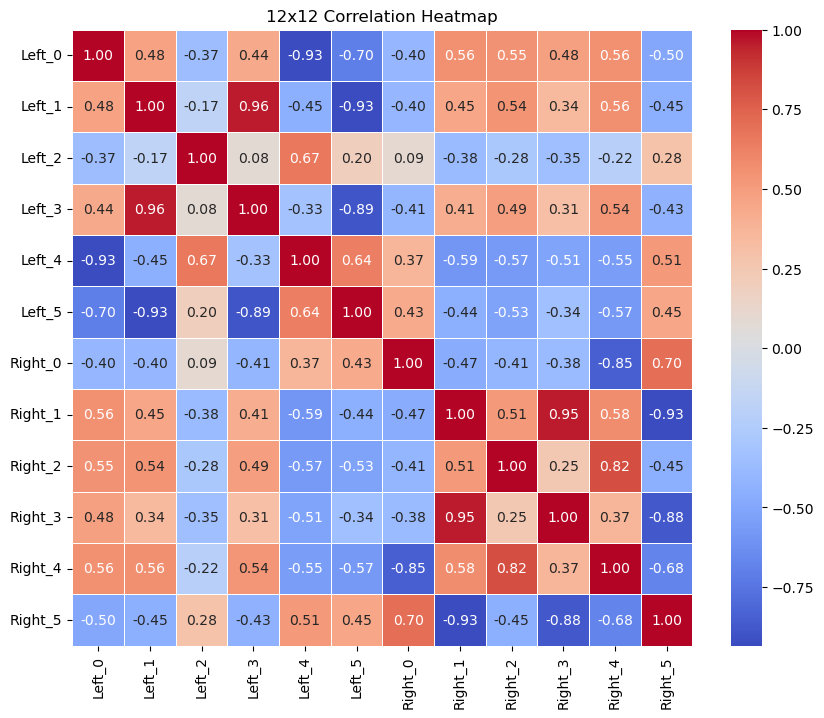

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a 12x12 correlation matrix (assuming matrix_left and matrix_right exist)
combined_matrix = np.hstack((matrix_left, matrix_right))
correlation_matrix = np.corrcoef(combined_matrix, rowvar=False)

# Create labels for columns
labels = [f"Left_{i}" for i in range(6)] + [f"Right_{i}" for i in range(6)]

# Convert to DataFrame for better labeling
df_corr = pd.DataFrame(correlation_matrix, index=labels, columns=labels)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("12x12 Correlation Heatmap")
plt.show()


In [53]:
matrix_left = pd.DataFrame(matrix_left)
matrix_right = pd.DataFrame(matrix_right)

df_combined = pd.concat([matrix_left, matrix_right], axis=1)
df_combined.to_csv('nonsense_work.csv', index=True)